# Preparation for Colab

Make sure you're running a GPU runtime; if not, select "GPU" as the hardware accelerator in Runtime > Change Runtime Type in the menu. The next cells will install the `clip` package and its dependencies, and check if PyTorch 1.7.1 or later is installed.

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.9 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-o2xp2rsc
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-o2xp2rsc
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=9c9753ca86ad5bbd0cd059bf491ff5e9cb153a563758a9bd509a9ea030dfd93a
  Stored in directory: /tmp/pip-ephem-wheel-cache-720t9eo3/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)


Torch version: 2.1.1+cu121


/tmp/ipykernel_41483/3938929237.py:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import packaging


# Loading the model

`clip.available_models()` will list the names of available CLIP models.

In [2]:
import clip

clip.available_models()

/home/user/anaconda3/envs/food_detection/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [88]:
model, preprocess = clip.load("ViT-L/14@336px")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 427,944,193
Input resolution: 336
Context length: 77
Vocab size: 49408


# Image Preprocessing

We resize the input images and center-crop them to conform with the image resolution that the model expects. Before doing so, we will normalize the pixel intensity using the dataset mean and standard deviation.

The second return value from `clip.load()` contains a torchvision `Transform` that performs this preprocessing.



In [4]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7f815c85d430>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [1]:
store_name = '레체피제리아'

f = open('./menu_ocr.txt', 'r')

label_list = []
while(True):
    line = f.readline().strip(',\n')
    if line == '':
        break
    label_list += line.split(',')

label_list

['비앙카 네베',
 '풍기 에 살시찌아',
 '마리게리타 부팔라',
 '페퍼로니',
 '콰트로 포르마기',
 '프로슈토 루꼴라',
 '부라타 루꼴라',
 '봉골레',
 '알프레도',
 '화이트라구',
 '볼로네제',
 '해산물 파스타',
 '해산물 로제',
 '풍기폴로',
 '해산물 리조또',
 '찹스테이크',
 '모둠 버섯샐러드',
 '치킨 샐러드',
 '감자튀김 버팔로 윙봉',
 '탄산음료',
 '오렌지 주스',
 '에이드 블루레몬 자몽',
 '아메리카노 (ICEJHOT)',
 '참이슬 카스 테라 병맥주',
 '하이네켄 병맥주 산토리 하이볼']

In [57]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.0 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 131.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 194.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 137.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 150.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=f8633460ef4f817a0ee1c8c9eaa45100b7e228acbb17a0eb137a0ff535169c18
  Stored in directory: /tmp/pip-ephem-wheel-cache-j4_lywc2/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googlet

In [58]:
import googletrans

In [60]:
translator = googletrans.Translator()

en_label_list = []
for label in label_list:
    en_label = translator.translate(label, src='ko', dest='en')
    en_label_list.append(en_label.text)

en_label_list

['Bianca Neve',
 'Punggi in Salsiccia',
 'Margherita Bufala',
 'pepperoni',
 'Quattro Formaggi',
 'Prosciutto Arugula',
 'Burrata arugula',
 'vongole',
 'alfredo',
 "It's white",
 'bolognese',
 'seafood pasta',
 'seafood rosé',
 'polo',
 'seafood risotto',
 'Chop Steak',
 'Assorted Mushroom Salad',
 'Chicken Salad',
 'French Fries Buffalo Wing Bong',
 'Carbonated Drinks',
 'Orange juice',
 'Ade Blue Lemon Grapefruit',
 'Americano (ICEJHOT)',
 'Chamisul Castella Bottled Beer',
 'Heineken bottled beer Suntory Highball']

In [109]:
my_text_descriptions = [f"This is a photo of a {en_label}, a type of food" for en_label in en_label_list]
print(my_text_descriptions)
my_text_tokens = clip.tokenize(my_text_descriptions).cuda()

['This is a photo of a Bianca Neve, a type of food', 'This is a photo of a Punggi in Salsiccia, a type of food', 'This is a photo of a Margherita Bufala, a type of food', 'This is a photo of a pepperoni, a type of food', 'This is a photo of a Quattro Formaggi, a type of food', 'This is a photo of a Prosciutto Arugula, a type of food', 'This is a photo of a Burrata arugula, a type of food', 'This is a photo of a vongole, a type of food', 'This is a photo of a alfredo pasta, a type of food', 'This is a photo of a white ragu pasta, a type of food', 'This is a photo of a bolognese, a type of food', 'This is a photo of a seafood pasta, a type of food', 'This is a photo of a seafood rosé pasta, a type of food', 'This is a photo of a Risotto polo fungi, a type of food', 'This is a photo of a seafood risotto, a type of food', 'This is a photo of a Chop Steak, a type of food', 'This is a photo of a Assorted Mushroom Salad, a type of food', 'This is a photo of a Chicken Salad, a type of food', '

In [110]:
with torch.no_grad():
    my_text_features = model.encode_text(my_text_tokens).float()
    my_text_features /= my_text_features.norm(dim=-1, keepdim=True)

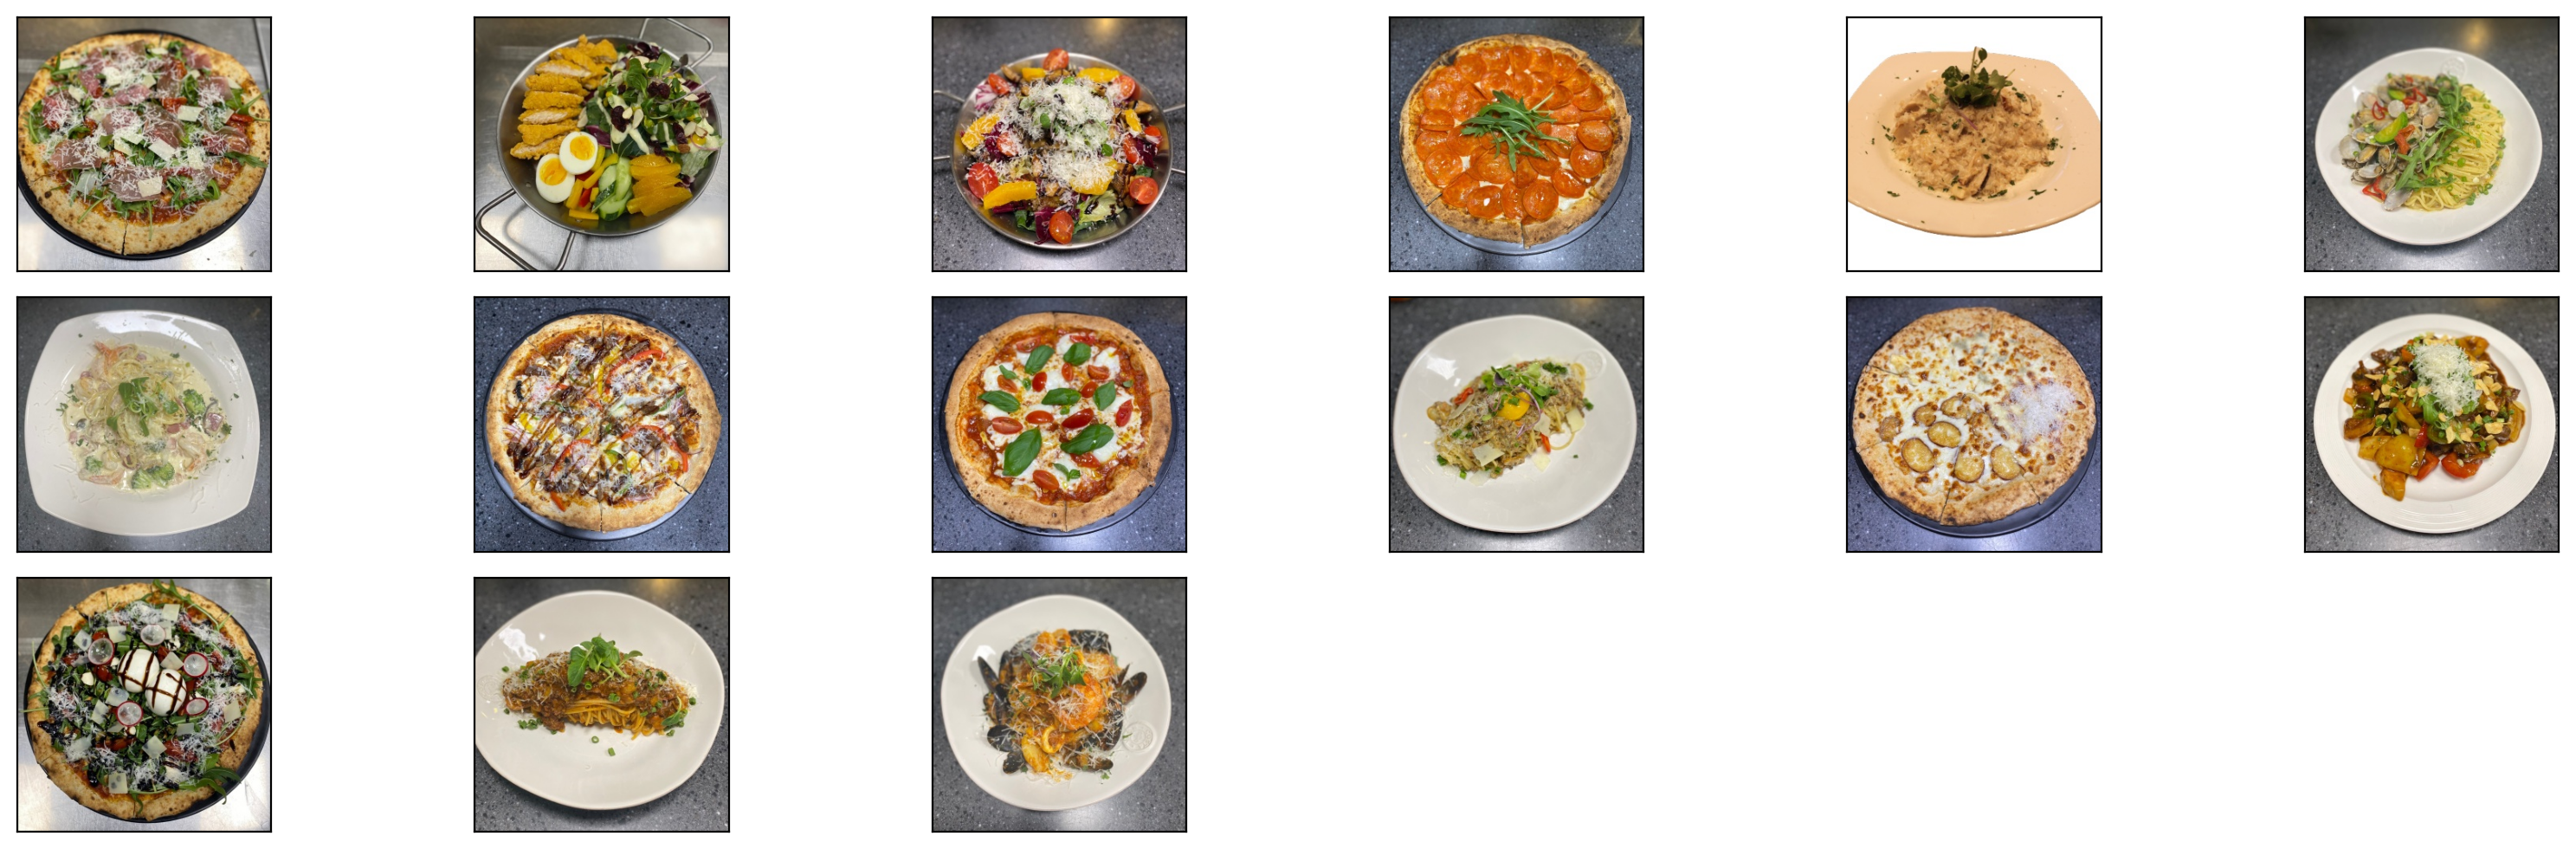

In [91]:
data_path = './menu_레체 피제리아_2023.11.23'

my_original_images = []
my_images = []
plt.figure(figsize=(16, 5))

for i, filename in enumerate([filename for filename in os.listdir(data_path) if filename.endswith(".png") or filename.endswith(".jpg")]):
    name = os.path.splitext(filename)[0]
    image = Image.open(os.path.join(data_path, filename)).convert("RGB")

    plt.subplot(3, 6, i + 1)
    plt.imshow(image)
    # plt.title(f"{filename}")
    plt.xticks([])
    plt.yticks([])

    my_original_images.append(image)
    my_images.append(preprocess(image))

plt.tight_layout()

In [92]:
my_image_input = torch.tensor(np.stack(my_images)).cuda()

In [93]:
with torch.no_grad():
    my_image_features = model.encode_image(my_image_input).float()

In [94]:
my_image_features /= my_image_features.norm(dim=-1, keepdim=True)

In [112]:
my_text_probs = (100.0 * my_image_features @ my_text_features.T).softmax(dim=-1)
my_top_probs, my_top_labels = my_text_probs.cpu().topk(5, dim=-1)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

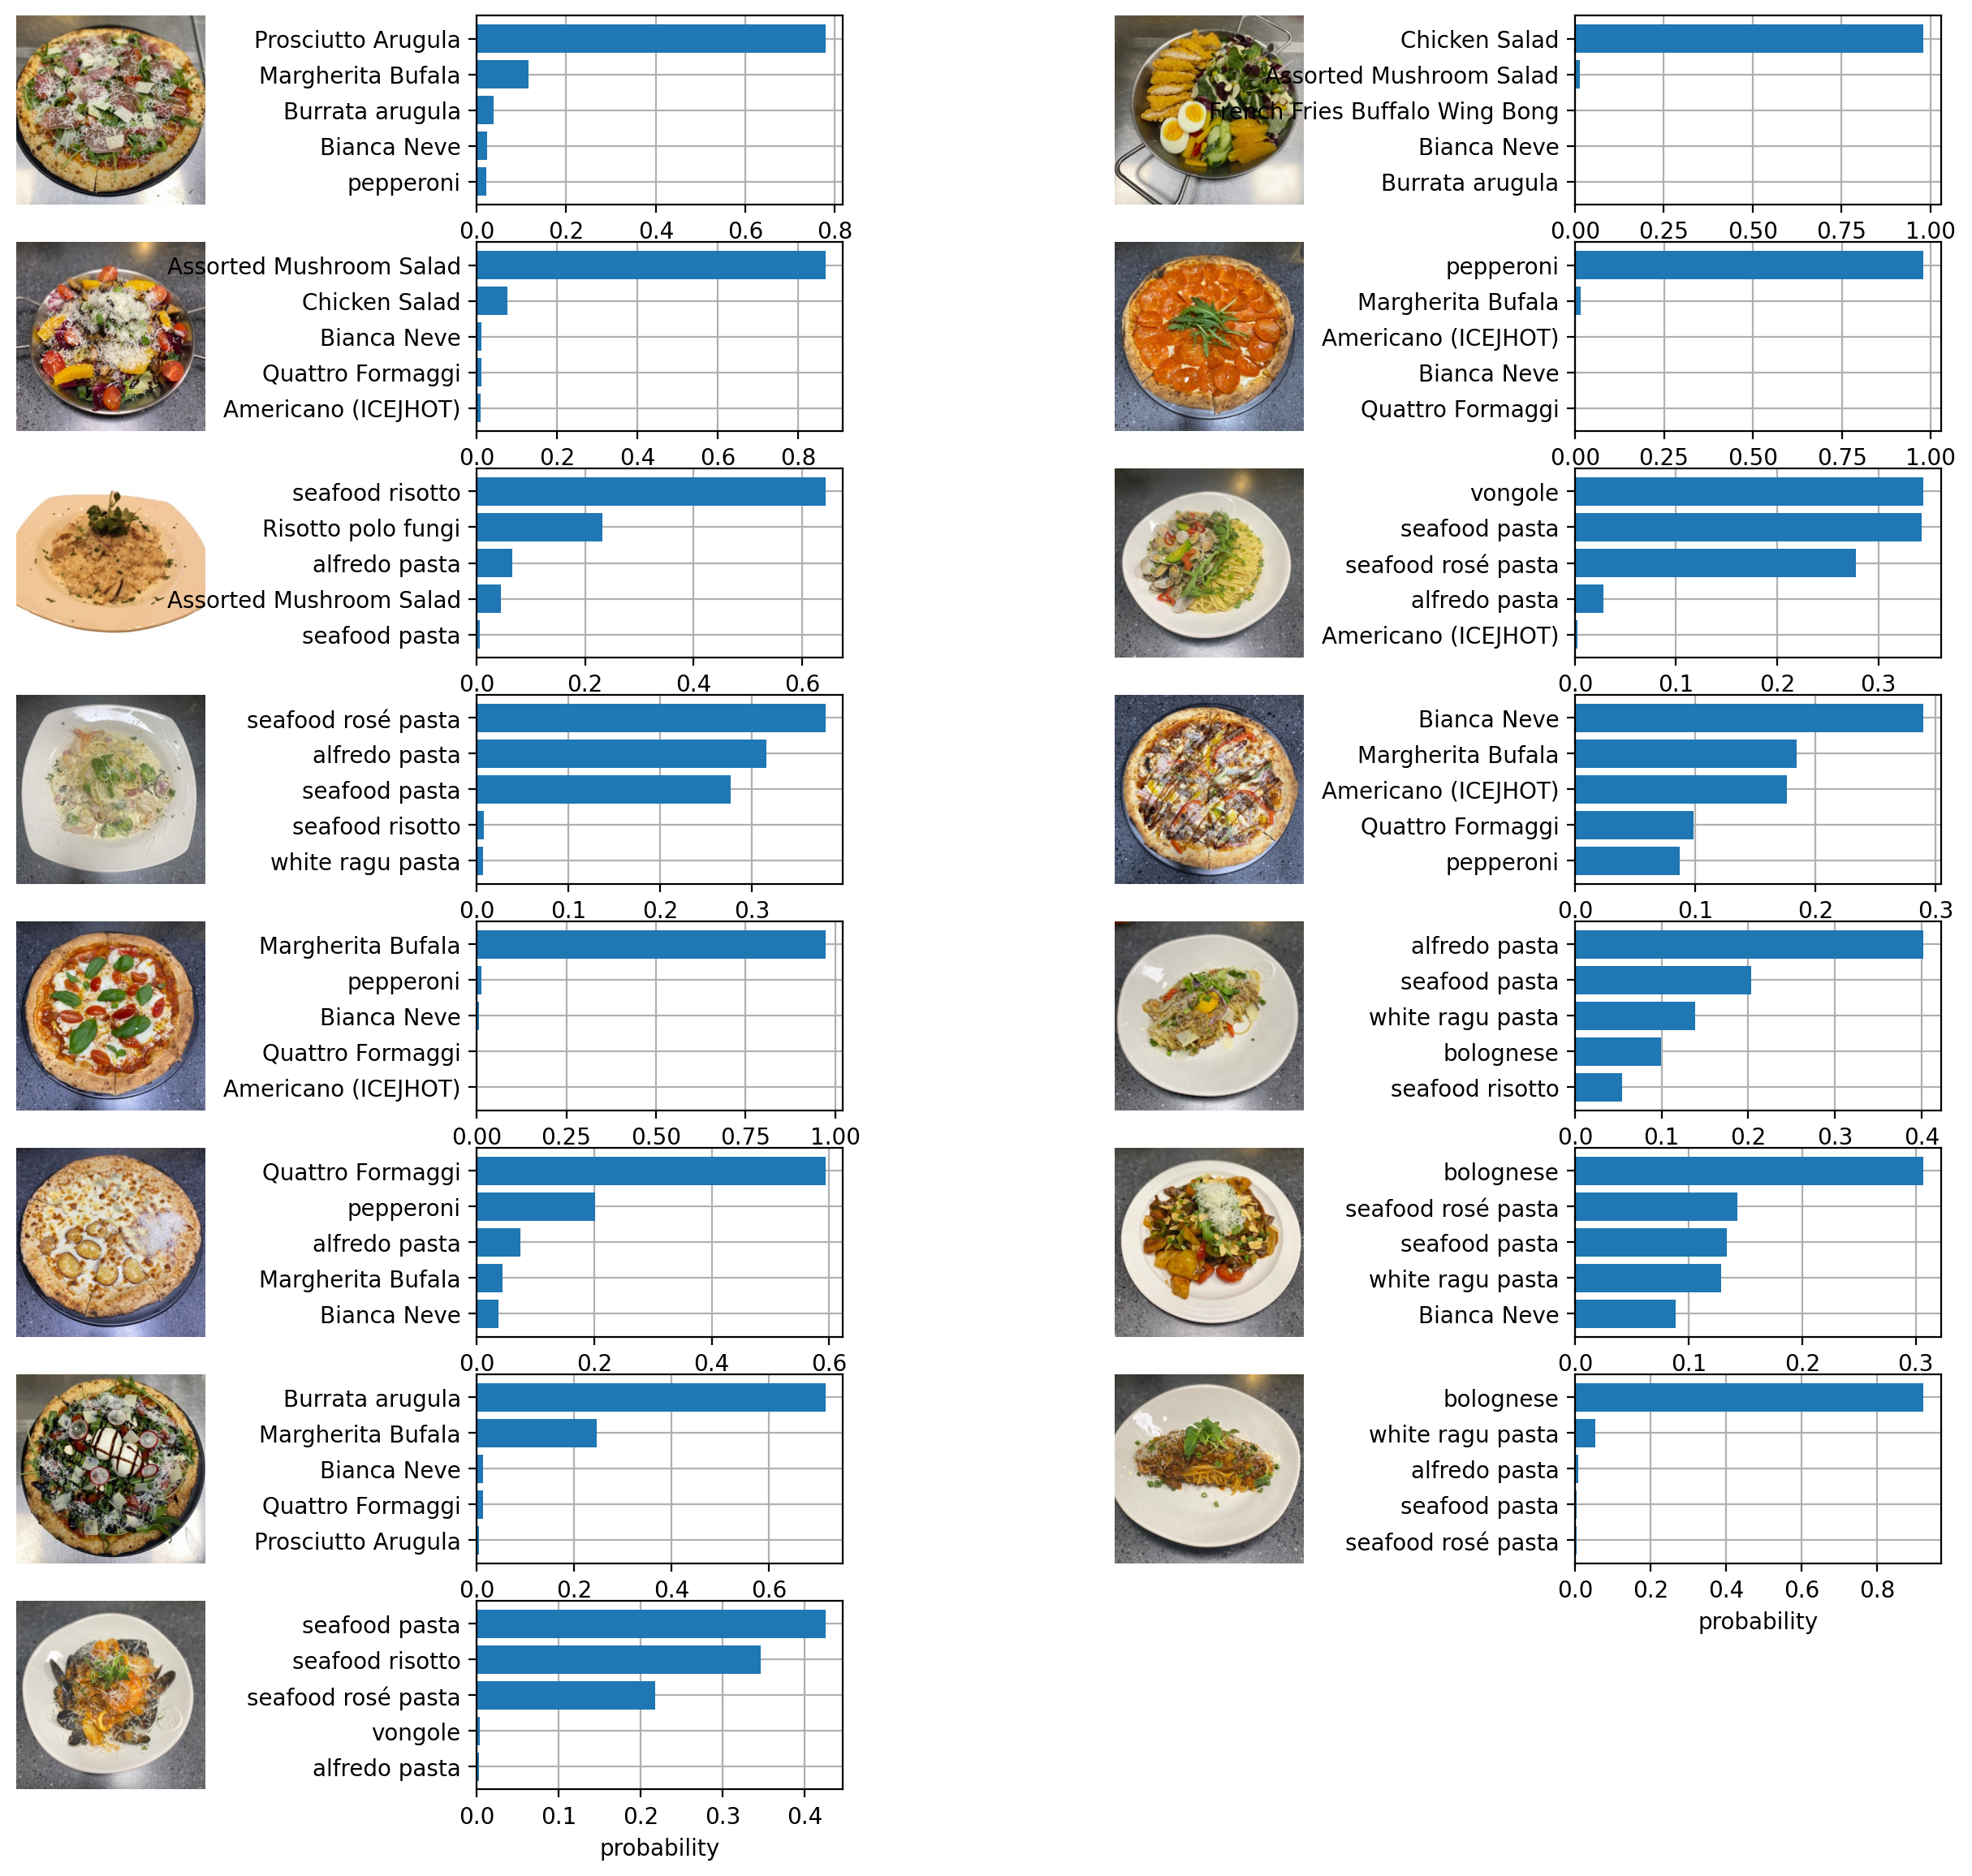

In [113]:
plt.figure(figsize=(16, 16))

for i, image in enumerate(my_original_images):
    plt.subplot(9, 4, 2 * i + 1)
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(9, 4, 2 * i + 2)
    y = np.arange(my_top_probs.shape[-1])
    plt.grid()
    plt.barh(y, my_top_probs[i])
    plt.gca().invert_yaxis()
    plt.gca().set_axisbelow(True)
    plt.yticks(y, [en_label_list[index] for index in my_top_labels[i].numpy()])
    plt.xlabel("probability")

plt.subplots_adjust(wspace=0.5)
plt.show()